In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./preprocess/filter2.csv')

In [23]:
# print(df.head())
print(df.info())
df_cleaned = df
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51772 entries, 0 to 51771
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Create time  51772 non-null  object
 1   Actor Id     51772 non-null  object
 2   Actor Name   51772 non-null  object
 3   Message      47601 non-null  object
 4   Type         51772 non-null  object
 5   Likes        51772 non-null  int64 
 6   Shares       51772 non-null  int64 
 7   Comments     51772 non-null  int64 
 8   Image        51772 non-null  object
 9   Link         51772 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51772 entries, 0 to 51771
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Create time  51772 non-null  object
 1   Actor Id     51772 non-null  object
 2   Actor Name   51772 non-null  object
 3   Message      47601 non-nu

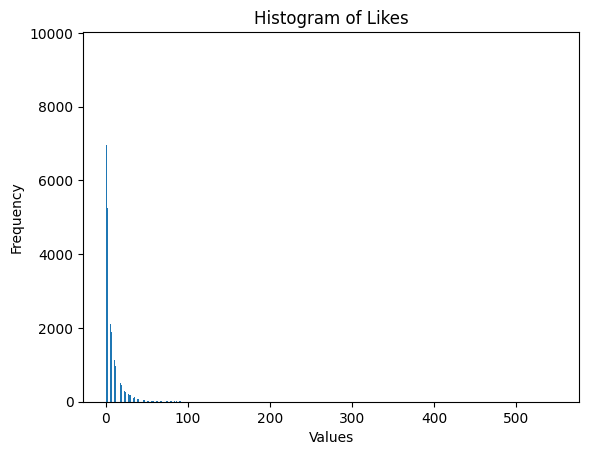

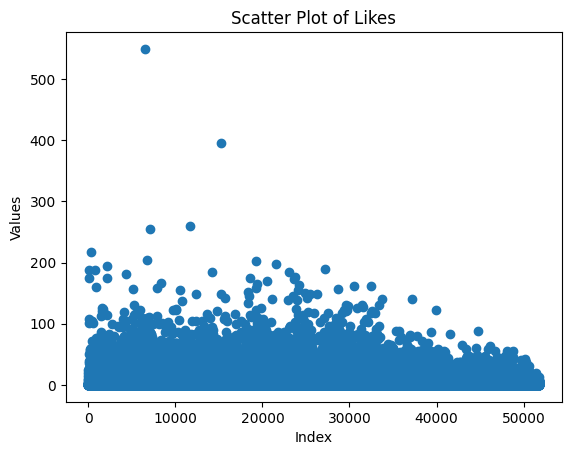

In [24]:
import matplotlib.pyplot as plt

# Plot histogram of Column2
plt.hist(df['Likes'], bins='auto')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Likes')
plt.show()

# Create scatter plot of Column2
plt.scatter(range(len(df['Likes'])), df['Likes'])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Likes')
plt.show()

In [5]:
from transformers import pipeline, AutoModel, AutoTokenizer

# model_name = 'vinai/bartpho-word-base'
model_name = 'vinai/phobert-base-v2'
classifier = pipeline("zero-shot-classification", model=model_name)

model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weig

In [6]:
messages = df_cleaned['Message'].values.tolist()
text_processed = messages[:10]

file_path = './preprocess/target.txt'
keyword_list = []
with open(file_path, 'r') as file:
    for line in file:
        word = line.strip()  # Remove leading/trailing whitespaces and newline characters
        keyword_list.append(word)

print(keyword_list)


['php', 'java', 'javascript', 'java engineer', 'javascript engineer', 'php engineer', 'JS Developer', 'PHP Developer', 'Java Developer', 'AI Engineer', 'AI Developer', 'Dầu Nhật', 'Dầu Nhật Bản', '']


In [7]:
vocab = tokenizer.get_vocab()
vocab_list = list(vocab.keys())

def filter_sentence(sentences, vocab_list):
    filtered_sentences = []
    for sentence in sentences:
        words = sentence.split()
        filtered_words = [word for word in words if word in vocab_list]
        filtered_sentences.append(' '.join(filtered_words))

    return filtered_sentences


filtered_sentence = filter_sentence(text_processed, vocab_list)
print(filtered_sentence)

['Năm 2023 đánh dấu nhiều tiến bộ và các xu hướng công nghệ mới Nay Đà Nẵng bắt trend cho ra list hợp thời không chiêu mộ các bạn đam mê thử nghiệm thử thách và phát triển tên tốt nghiệp các ngành Computer Computer - Không gian và thời gian làm việc thân linh hoạt và cởi nơi bạn có thể giải toả căng thẳng với sân chơi và nhiều tiện ích khác - Gói bảo hiểm ER dành riêng cho nhân viên ER - - Open Talk Company - Review lương 2 - 20 ngày nghỉ phép có lương - Thưởng cuối năm - Gói trao quyền tự thiết kế phúc lợi theo nhu cầu và mục đích cá nhân', '6 Các công việc về Công Nghệ trên các kênh - Khu Thanh Khê - Cẩm Ngũ Hành Sơn - Đà Nẵng - Thời trợ xoay 8h - 11h30 13h30 - 17h 18h - 21h30 - Thu + Thưởng hệ để trao đổi rõ', 'Dầu Nhật Chỉ Bạn Miễn Phí Cách Tăng Thời Gian Quan Hệ Trên 60 Phút - Hết 100% - IB Zalo :', 'Thử full lương IB nhận ạ', '', '', 'người gõ văn bản 1 giới hạn nghiêm túc trên đều trả theo Xong bài banking ngay trong ngày Tâm cho mình', '', 'Hiện tại em đang tìm vài công nhân ma

In [18]:
# some test about automodel classification.

from transformers import AutoModelForSequenceClassification

text = "Tôi là sinh viên trường đại học bách khoa hà nội"
t = classifier(text,
        candidate_labels=keyword_list,
    )
print(t)

nli_model = AutoModelForSequenceClassification.from_pretrained(model_name)

inputs = tokenizer(text, return_tensors="pt")
logits = nli_model(**inputs).logits
print('logits', logits)

{'sequence': 'Tôi là sinh viên trường đại học bách khoa hà nội', 'labels': ['PHP Developer', 'Java Developer', 'JS Developer', 'AI Developer', 'java', 'Dầu Nhật Bản', '', 'Dầu Nhật', 'javascript', 'AI Engineer', 'java engineer', 'php engineer', 'javascript engineer', 'php'], 'scores': [0.07352783530950546, 0.07287077605724335, 0.07285720109939575, 0.07272126525640488, 0.07229834794998169, 0.07211949676275253, 0.07191289961338043, 0.07088898867368698, 0.07059216499328613, 0.07045997679233551, 0.07023482769727707, 0.07021868973970413, 0.06979132443666458, 0.06950616091489792]}


Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weig

logits tensor([[0.0265, 0.1126]], grad_fn=<AddmmBackward0>)


https://huggingface.co/docs/transformers/tasks/sequence_classification

In [26]:
from torch.nn.utils.rnn import pad_sequence
print('keyword_list', keyword_list)
predictions = []
for post in filtered_sentence:
    print('post', post[:120])
    try:
        t = classifier(post,
            candidate_labels=keyword_list,
        )
        predictions.append(t)
    except Exception as e:
        print('e', e, post)
        continue

print(predictions)

def get_small_part(x):
    x['labels'] = x['labels'][0:2]
    x['scores'] = x['scores'][0:2]
    return x

predictions = list(map(get_small_part, predictions))
df_predict = pd.DataFrame(predictions, columns=["sequence", "labels", "scores"])

print(df_predict)


keyword_list ['php', 'java', 'javascript', 'java engineer', 'javascript engineer', 'php engineer', 'JS Developer', 'PHP Developer', 'Java Developer', 'AI Engineer', 'AI Developer', 'Dầu Nhật', 'Dầu Nhật Bản', '']
post Năm 2023 đánh dấu nhiều tiến bộ và các xu hướng công nghệ mới Nay Đà Nẵng bắt trend cho ra list hợp thời không chiêu mộ 
post 6 Các công việc về Công Nghệ trên các kênh - Khu Thanh Khê - Cẩm Ngũ Hành Sơn - Đà Nẵng - Thời trợ xoay 8h - 11h30 13h30
post Dầu Nhật Chỉ Bạn Miễn Phí Cách Tăng Thời Gian Quan Hệ Trên 60 Phút - Hết 100% - IB Zalo :
post Thử full lương IB nhận ạ
post 
e You must include at least one label and at least one sequence. 
post 
e You must include at least one label and at least one sequence. 
post người gõ văn bản 1 giới hạn nghiêm túc trên đều trả theo Xong bài banking ngay trong ngày Tâm cho mình
post 
e You must include at least one label and at least one sequence. 
post Hiện tại em đang tìm vài công nhân mang bao tay về em trả /1 ai làm thì nhắn em h

In [27]:
df_predict.to_csv('./preprocess/df_predict.csv', index=True)

In [10]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

w2v_model = gensim.models.KeyedVectors.load_word2vec_format('../model/wiki.vi.model.bin', binary=True)

In [11]:
analogy_words = w2v_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)
print(analogy_words)

[('blondie', 0.5220155715942383), ('behaving', 0.5198245644569397)]


In [51]:
def caculate_score(sentence):
    arr_score = []
    if isinstance(sentence, float):
        return arr_score
    words = sentence.split()
    
    for word in words:
        scores = []
        for word2 in keyword_list:
            if word in w2v_model.key_to_index and word2 in w2v_model.key_to_index:
                score = w2v_model.similarity(word, word2)
            else:
                score = 0
            scores.append(score)
        arr_score.append(scores)
    print('arr_score', arr_score)
    max_index = np.max(arr_score, axis=0)
    print('max_index', max_index)
    return max_index

# messages = df_cleaned['Message'].values.tolist()
df_cleaned['Score'] = df_cleaned['Message'][:100].apply(caculate_score)
print(df_cleaned.head())
# Export the column to CSV
df_cleaned['Score'].to_csv('./preprocess/score.csv', index=True, header=['Score'])
# def caculate_score(sentences, labels = []):
#     scores = []
#     for sentence in sentences:
#         words = sentence.split()
#         keyword_list
#         for word in words:
#             model.similarity(word, word2)

#     return filtered_sentences


# filtered_sentence = filter_sentence(text_processed, vocab_list)
# score = model.similarity(word1, word2)

arr_score [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.105662234, -0.059420012, -0.13612059, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.036385573, 0.052102186, 0.084349476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.07539593, 0.0664308, -0.064636365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.07939769, -0.006635243, -0.10475369, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.027813096, -0.029609362, -0.07659813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.24567792, -0.061020046, -0.2285226, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.04948772, -0.002131803, -0.0323976, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.032891672, -0.0062798895, -0.038773276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.08650403, 0.08286604, -0.036304012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.1113151, -0.048277747, -0.10445741, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.03611484, -0.028141346, -0.029449204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.072273426, -0.053979486, -0.026029103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [

In [13]:
messages = df_cleaned['Message'].values.tolist()

from torch.nn.utils.rnn import pad_sequence
tokenized_keywords = []
for keyword in messages[:10]:
    try:
        tokens = tokenizer.tokenize(keyword)
        print('tokens', tokens)
        token_ids = tokenizer.convert_tokens_to_ids(tokens)
        tokenized_keywords.append(token_ids)
    except Exception as e:
        print('keyword', keyword)
        print('error', e)

input_ids = pad_sequence([torch.tensor(sublist) for sublist in tokenized_keywords], batch_first=True)
outputs = phobert(input_ids)
print(outputs[0].shape)

tokens ['Năm', '2023', 'đánh', 'dấu', 'nhiều', 'tiến', 'bộ', 'và', 'các', 'xu', 'hướng', 'công', 'nghệ', 'mới', '(@@', 'AI@@', ',', 'ML@@', ',', 'Io@@', 'T@@', ',@@', '…@@', ').', 'Nay', '𝐄@@', '𝐒@@', '𝐓', '𝐑@@', '𝐎@@', '𝐔@@', '𝐆@@', '𝐄', 'Đà', 'Nẵng', 'bắt', 'trend', 'cho', 'ra', 'list', 'jo@@', 'b', 'hợp', 'thời', 'không', 'ké@@', 'm@@', ',', 'chiêu', 'mộ', 'các', 'bạn', 'đam', 'mê', 'thử', 'nghiệm', 'CN@@', ',', 'thử', 'thách', 'và', 'phát', 'triển', 'tên', 'lử@@', 'a.@@', '\n', '🎯', '𝐘@@', '𝐜@@', ':', '𝐓@@', '𝐮@@', '̛@@', '̀', '𝟏@@', '.@@', '𝟓', '𝐧@@', '𝐚@@', '̆@@', '𝐦', '𝐤@@', '𝐧@@', ',', 'tốt', 'nghiệp', 'các', 'ngành', 'Computer', 'Sci@@', 'en@@', 'ce@@', ',', 'Infor@@', 'mation', 'Techno@@', 'log@@', 'y@@', ',', 'Computer', 'Engine@@', 'er@@', 'ing@@', ',', 'Mathe@@', 'ma@@', 'tic@@', 's@@', ',@@', '...@@', '\n', '-@@', '-@@', '-@@', '-@@', '-@@', '-@@', '-@@', '-@@', '\n', '🍀', '𝟎@@', '𝟒', '𝐀@@', '𝐈', '𝐄@@', '𝐧@@', '𝐠@@', '𝐢@@', '𝐧@@', '𝐞@@', '𝐞@@', '𝐫@@', '𝐬', '(@@', 'Junior'

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:15                                                                                   │
│                                                                                                  │
│   12 │   │   print('keyword', keyword)                                                           │
│   13 │   │   print('error', e)                                                                   │
│   14                                                                                             │
│ ❱ 15 input_ids = pad_sequence([torch.tensor(sublist) for sublist in tokenized_keywords], batc    │
│   16 outputs = phobert(input_ids)                                                                │
│   17 print(outputs[0].shape)                                                                     │
│   18                                                                                             │
│                                                                                                  │
│ in <listcomp>:15                                                                                 │
│                                                                                                  │
│   12 │   │   print('keyword', keyword)                                                           │
│   13 │   │   print('error', e)                                                                   │
│   14                                                                                             │
│ ❱ 15 input_ids = pad_sequence([torch.tensor(sublist) for sublist in tokenized_keywords], batc    │
│   16 outputs = phobert(input_ids)                                                                │
│   17 print(outputs[0].shape)                                                                     │
│   18                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'torch' is not defined

In [14]:
tokenEncoding = tokenizer(messages[:10], padding=True, truncation=True, return_tensors='pt', max_length=257)

print(tokenEncoding['input_ids'].shape)
# print('tokenizer.encode(texts)', tokenizer.encode(texts))
# input_ids = torch.tensor([tokenizer.encode(texts)])
# print(tokenizer.encode(texts))

features = []
for f in tokenEncoding['input_ids'][:1]:
    # print('f', f)
    f1 = f.unsqueeze(dim=0)
    print('f1', f1)
    feat = phobert(f1)  # Models outputs are now tuples
    features.append(feat)


torch.Size([10, 257])
f1 tensor([[    0,   434, 18280,   480,  3309,    36,  1447,   215,     6,     9,
          7044,   455,   675,  5116,    60, 14157, 14877,     4, 39024,     4,
         32491,   982, 10959,     3, 15831,  6993,     3,     3,     3,     3,
             3,     3,     3,     3,  5194, 14715,   537, 30525,    13,    40,
         23725,  9863,  2774,  2288,   790,    17, 43483,  1387,     4,  4065,
          2849,     9,    88, 14341,  3984,  1176, 12151,  8479,     4,  1176,
         15885,     6,  1073, 12155,   221, 30590, 19379,     3,     3,     3,
             3,    27,     3,     3,     3, 61538,     3,  2586,     3,     3,
             3,     3,     3,     3,     3,     4,   167,  4422,     9,   255,
         52836, 20201,  1883,  7360,     4, 33189, 27386, 58078, 13459,  1581,
             4, 52836, 55759,  1926,  5936,     4, 45803,  3240, 10339,  1302,
         10959, 34976,     3,   770,   770,   770,   770,   770,   770,   770,
           770,     3,     

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:13                                                                                   │
│                                                                                                  │
│   10 │   # print('f', f)                                                                         │
│   11 │   f1 = f.unsqueeze(dim=0)                                                                 │
│   12 │   print('f1', f1)                                                                         │
│ ❱ 13 │   feat = phobert(f1)  # Models outputs are now tuples                                     │
│   14 │   features.append(feat)                                                                   │
│   15                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'phobert' is not defined